collect

In [1]:
# Import necessary libraries
import requests
import pandas as pd

# Define the API endpoint and parameters
01',
    'end_date' : '2023-09-01',
    'hourly' : 'temperature_2m,relativehumidity_2m,precipitation_probability,precipitation,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,evapotranspiration,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_80m,windspeed_120m,windspeed_180m,windgusts_10m,temperature_80m,temperature_120m,temperature_180m',
}

# Make an API request to fetch weather data
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Convert data to a DataFrame for further processing
    df = pd.DataFrame(data[api_url = "https://api.open-meteo.com/v1/forecast"
params = {
    "daily": "rain_sum",
    'latitude' : '30.3229',
    'longitude' : '78.0317',
    'timezone' : 'Asia/Kolkata',
    'start_date' : '2022-12-"hourly"])
else:
    print("Failed to fetch data. Check the API URL and parameters.")

# Save the data to a CSV file for future use
df.to_csv("weather_data.csv", index=False)

pre-process

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (replace 'your_dataset.csv' with your dataset's file path)
data = pd.read_csv('weather_data.csv')

# Ensure that all remaining columns contain only numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Define the list of meteorological parameters to keep
parameters_to_keep = [
    'precipitation',
    'relativehumidity_2m',
    'cloudcover',
    'evapotranspiration',
]

# Assign weights to the parameters you want to keep
weights = [
    0.45,   # precipitation
    0.1,    # relativehumidity_2m
    0.25,   # cloudcover
    0.1,    # evapotranspiration
]

# Normalize the parameter values using Min-Max scaling
scaler = MinMaxScaler()
data[parameters_to_keep] = scaler.fit_transform(data[parameters_to_keep])

# Calculate the relative probability for each row
data['RelativeProbability'] = data[parameters_to_keep].dot(weights)

# Drop unnecessary columns (replace 'columns_to_drop' with the columns you want to remove)
columns_to_drop = [
    'temperature_2m',
    'precipitation_probability',
    'pressure_msl',
    'surface_pressure',
    'cloudcover_low',
    'cloudcover_mid',
    'cloudcover_high',
    'et0_fao_evapotranspiration',
    'windspeed_10m',
    'windspeed_80m',
    'windspeed_120m',
    'windspeed_180m',
    'windgusts_10m',
    'temperature_80m',
    'temperature_120m',
    'temperature_180m',
]

data.drop(columns=columns_to_drop, inplace=True)

# Save the updated dataset to a new CSV file
data.to_csv('dataset_with_relative_probability.csv', index=False)

random-forest-regressor

c:\Users\Hp\Coding-Shit\learning-python\cloudburst-prediction\env\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Hp\Coding-Shit\learning-python\cloudburst-prediction\env\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean Squared Error: 1.4614898216000241e-05


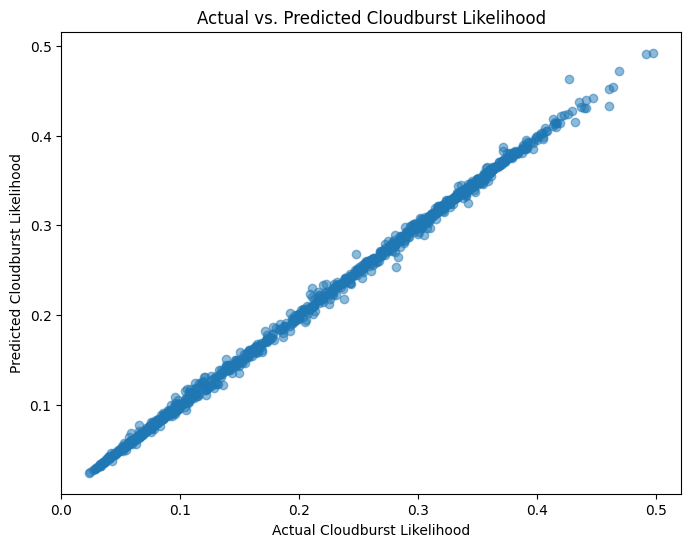

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset with relative probability (replace 'dataset_with_relative_probability.csv' with your dataset file)
data = pd.read_csv('dataset_with_relative_probability.csv')

# Define the target variable (cloudburst likelihood)
y = data['RelativeProbability']

# Define the features
X = data.drop(columns=['RelativeProbability'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the imputer with a strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_imputed)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual cloudburst likelihood
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Cloudburst Likelihood')
plt.ylabel('Predicted Cloudburst Likelihood')
plt.title('Actual vs. Predicted Cloudburst Likelihood')
plt.show()

hist-gradient-boost-regressor

Mean Squared Error: 2.285615635196192e-05


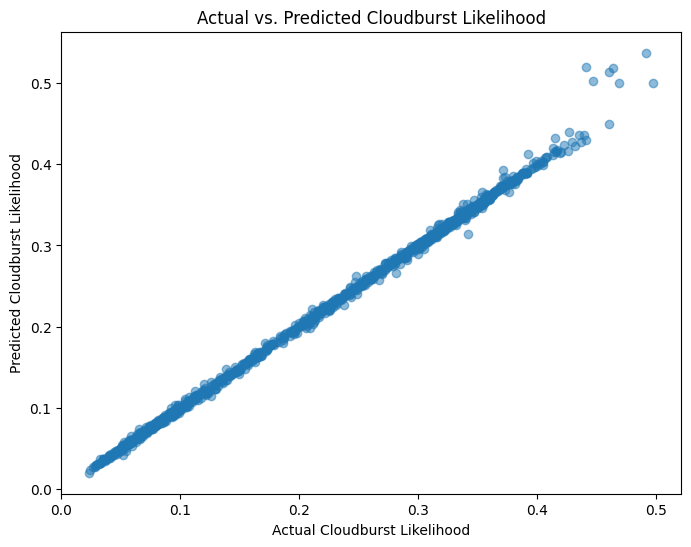

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset with relative probability (replace 'dataset_with_relative_probability.csv' with your dataset file)
data = pd.read_csv('dataset_with_relative_probability.csv')

# Define the target variable (cloudburst likelihood)
y = data['RelativeProbability']

# Define the features
X = data.drop(columns=['RelativeProbability'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
regressor = HistGradientBoostingRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual cloudburst likelihood
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Cloudburst Likelihood')
plt.ylabel('Predicted Cloudburst Likelihood')
plt.title('Actual vs. Predicted Cloudburst Likelihood')
plt.show()